# Rutina para todos los métodos

## Plot de $P(x)$

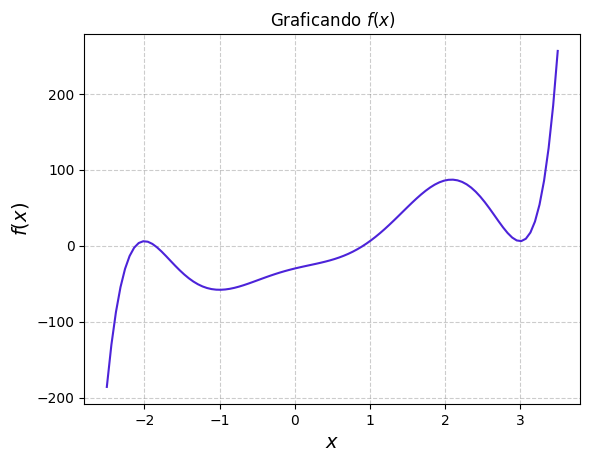

In [60]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return (x**7 
        - 3*x**6 
        - 8*x**5 
       + 20*x**4 
       + 15*x**3 
       - 13*x**2 
       + 24*x 
       - 30)

# Plotting f(x)
a, b, N = -2.5, 3.5, 100
x = np.linspace(a, b, N)
y = f(x)

plt.plot(x, y, color='#4c23d9')
plt.title('Graficando $f(x)$')
plt.xlabel("$x$", fontsize=14)
plt.ylabel("$f(x)$", fontsize=14)
plt.grid(True, ls = '--', c = 'k', alpha = 0.2)

plt.show()


* Viendo la gráfica para nuestra función, podemos ver que necesitamos encontrar 3 ceros distintos, 2 cercanos a $x = -2$ y uno cerca de $x = 1$
* El muestreo de 100 puntos es razonable para los métodos a utilizar a continuación pues permiten separar de buena manera  
los intervalos donde pueden haber cambios de signo, esenciales para los métodos de bisección y posición falsa,   
además de conseguir mejores puntos iniciales para los métodos de la secante y de Newton-Raphson

## Funciones para método de Bisección

In [49]:
def find_root_bis(x1, x2, delta, max_iter):
    f1, f2 = f(x1), f(x2)  

    count = 0
    while np.abs(x2 - x1) > delta and count < max_iter:
        x3 = 0.5 * (x1 + x2)
        f3 = f(x3) 
        if f1 * f3 > 0:
            x1, f1 = x3, f3
        else:
            x2, f2 = x3, f3
        count += 1

    dist = x2 - x1
    print(f'Distancia entre bordes: {dist}')
    print(f'Numero de iteraciones: {count}')
    return 0.5 * (x1 + x2), dist, count

# Encontrando la raiz en el intervalo [l1, l2],
# con muestreo tamaño L, se crea una 
# función para simplificar aplicación

def root_interval(l1, l2, L, function):
    var = (l2 - l1) / L
    delta = 1e-5
    max_iter = int(np.log2(var/delta)) + 1

    for j in range(L):
        x1, x2 = l1 + j * var, l1 + (j + 1) * var
        x0 = 0.5*(x1 + x2)
        if f(x1) * f(x2) < 0:
            root, dist, count = function(x1, x2, delta, max_iter)
            print(f'Root: {root}')
            f_root = f(root)
            print(f'f(root): {f_root}')
            print('---')

    data = [dist, count, root, f_root]
    return data
    

### Raíces en Bisección

In [50]:
bis = root_interval(a, b, N, find_root_bis)



Distancia entre bordes: 7.324218750159872e-06
Numero de iteraciones: 13
Root: -2.1158996582031255
f(root): 0.00019635687134922364
---
Distancia entre bordes: 7.324218750159872e-06
Numero de iteraciones: 13
Root: -1.8587316894531252
f(root): 8.52018142580846e-05
---
Distancia entre bordes: 7.3242187499378275e-06
Numero de iteraciones: 13
Root: 0.9113537597656248
f(root): -0.00019510420250412608
---


## Funciones para Posición Falsa

In [51]:
def find_root_pf(x1, x2, delta, max_iter):
    f1, f2 = f(x1), f(x2)  

    count = 0
    while np.abs(x2 - x1) > delta and count < max_iter:
        x3 = x1 - f1 * (x2 - x1) / (f2-f1)
        f3 = f(x3) 
        if f1 * f3 > 0:
            x1, f1 = x3, f3
        else:
            x2, f2 = x3, f3
        count += 1

    dist = x2 - x1
    print(f'Distancia entre bordes: {dist}')
    print(f'Numero de iteraciones: {count}')
    return 0.5 * (x1 + x2), dist, count

### Raíces en Posición Falsa

In [52]:
pf = root_interval(a, b, N, find_root_pf)



Distancia entre bordes: 0.024098595507155984
Numero de iteraciones: 13
Root: -2.127950702246422
f(root): -1.4441420080161507
---
Distancia entre bordes: 2.220446049250313e-16
Numero de iteraciones: 12
Root: -1.858730558982339
f(root): 1.4210854715202004e-14
---
Distancia entre bordes: 4.6629367034256575e-15
Numero de iteraciones: 7
Root: 0.91135684021459
f(root): -1.4921397450962104e-13
---


## Funciones para Secante

In [53]:
def find_root_sec(x1,x2, delta, max_iter): 
    f1 = f(x1)
    f2 = f(x2)
    count = 0
    while np.abs(x2 - x1) > delta and count < max_iter:
        x3 = x1 - f1 * (x2 - x1) / (f2-f1)
        f3 = f(x3)
        x1, f1 = x2, f2
        x2, f2 = x3, f3
        count += 1
    
    dist  = x2 - x1
    print(f'Distancia entre bordes: {dist}')
    print(f'Numero de iteraciones: {count}')
    return 0.5 * (x1 + x2), dist, count

### Raíces en Secante

In [54]:
sec = root_interval(a, b, N, find_root_sec)


Distancia entre bordes: -1.8355257491720067e-07
Numero de iteraciones: 5
Root: -2.11590131274646
f(root): 1.0316272373245283e-05
---
Distancia entre bordes: -3.5085910488064087e-07
Numero de iteraciones: 4
Root: -1.8587303836148057
f(root): -1.3217215865779508e-05
---
Distancia entre bordes: 2.384544254385723e-06
Numero de iteraciones: 3
Root: 0.9113556486043957
f(root): -7.547227733795125e-05
---


## Funciones para Newton-Raphson

In [55]:
def df(x):
    return (7*x**6 
        - 6*3*x**5 
        - 5*8*x**4 
       + 4*20*x**3 
       + 3*15*x**2 
       - 2*13*x 
       + 24)

def find_root_nr(x1,x2, delta, max_iter):
    f1 = f(x1)
    count = 0
    while np.abs(x2 - x1) > delta and count < max_iter:
        x3 = x1 - f1 / df(x1)
        f3 = f(x3)
        x2, f2 = x1, f1
        x1, f1 = x3, f3
        count += 1

    dist = x2 - x1
    print(f'Distancia entre bordes: {dist}')
    print(f'Numero de iteraciones: {count}')
    return 0.5 * (x1 + x2), dist, count

### Raíces en Newton-Raphson

In [56]:
nr = root_interval(a, b, N, find_root_nr)

Distancia entre bordes: -6.966450971646054e-09
Numero de iteraciones: 4
Root: -2.1159014079761063
f(root): -3.916656012847852e-07
---
Distancia entre bordes: 1.2901130386211435e-08
Numero de iteraciones: 4
Root: -1.8587305525317739
f(root): -4.861702791458811e-07
---
Distancia entre bordes: 3.819898023338375e-06
Numero de iteraciones: 3
Root: 0.911358750174958
f(root): 0.00012097026925061982
---


## Resumen de iteraciones por método

* Bisección:      13 iteraciones para todas las raíces
* Posición falsa: 13, 12 y 7 iteraciones respectivamente
* Secante:        5, 4 y 3 iteraciones 
* Newton-Raphson: 4, 4 y 3 iteraciones  

Si bien en el enunciado se menciona que Newton-Raphson no debería ser el método más eficiente, en mi implementación si lo es.  
La justificación para esto se puede hallar en el muestreo de 100 puntos para encontrar los puntos iniciales, pues al ser buenos estos,  
convergerá rápidamente. Es bueno notar que si se le da un muestreo de menor cantidad de puntos, es mucho más probable que sea menos  
eficiente que el método de la secante, y lo contrario si se dan más puntos, como se puede ver en el código de abajo. 
 
Esto se debe a que, ya que el método de Newton-Raphson depende de la derivada, si resulta ser que la derivada en el punto inicial aleja  
al método de la raíz (por ejemplo, funciones que oscilen cerca de la raíz), la implementación tomará más iteraciones para "volver" a un  
punto que le permita llegar a la raíz. 


In [57]:
nr_30 = root_interval(a, b, 30, find_root_nr)

Distancia entre bordes: -1.0540461836683335e-09
Numero de iteraciones: 6
Root: -2.1159014050199048
f(root): -5.9260329976495996e-08
---
Distancia entre bordes: 1.2901130386211435e-08
Numero de iteraciones: 4
Root: -1.8587305525317739
f(root): -4.861702791458811e-07
---
Distancia entre bordes: 8.115666361163676e-09
Numero de iteraciones: 3
Root: 0.9113568442724256
f(root): 2.570087112019337e-07
---


In [58]:
nr_45 = root_interval(a, b, 45, find_root_nr)

Distancia entre bordes: -1.8525800049573604e-07
Numero de iteraciones: 5
Root: -2.115901497122066
f(root): -1.0415543691522089e-05
---
Distancia entre bordes: 3.6084827881310844e-07
Numero de iteraciones: 5
Root: -1.8587303785579035
f(root): -1.3598347948118317e-05
---
Distancia entre bordes: 3.7400116337238387e-10
Numero de iteraciones: 4
Root: 0.9113568404015928
f(root): 1.1843944491829461e-08
---


In [59]:
nr_1000 = root_interval(a, b, 1000, find_root_nr)

Distancia entre bordes: -5.232500965846043e-08
Numero de iteraciones: 2
Root: -2.1159014306554003
f(root): -2.941802492273382e-06
---
Distancia entre bordes: 9.983184723338923e-09
Numero de iteraciones: 3
Root: -1.8587305539907462
f(root): -3.7620955595230043e-07
---
Distancia entre bordes: 8.813736923296567e-06
Numero de iteraciones: 2
Root: 0.9113612471434998
f(root): 0.000279120143979128
---
